### Importando bibliotecas


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Fazendo leitura da base de dados

In [4]:
df = pd.read_csv("iris_2class.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


### Fazendo uma análise agrupando por espécie.

In [5]:
df.groupby("especie").describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
especie                                                                    
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
especie                             ...                          
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
especie                                                                
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

A partir das estatísticas retiradas pelo retorno da função acima, pude observar que na maioria das vezes as flores da espécie versicolor são menores que a virginica. Tendo isso, podemos fazer uma análise para saber em qual espécie tal flor se enquadra a partir de seu comprimento do petal e sepal.

# Histograma

Fazendo um histograma pra cada espécie, sendo um gráfico para cada coluna. Como podemos ver, em geral, as flores da espécie virginica são maiores que a outra espécie em todos os atributos.

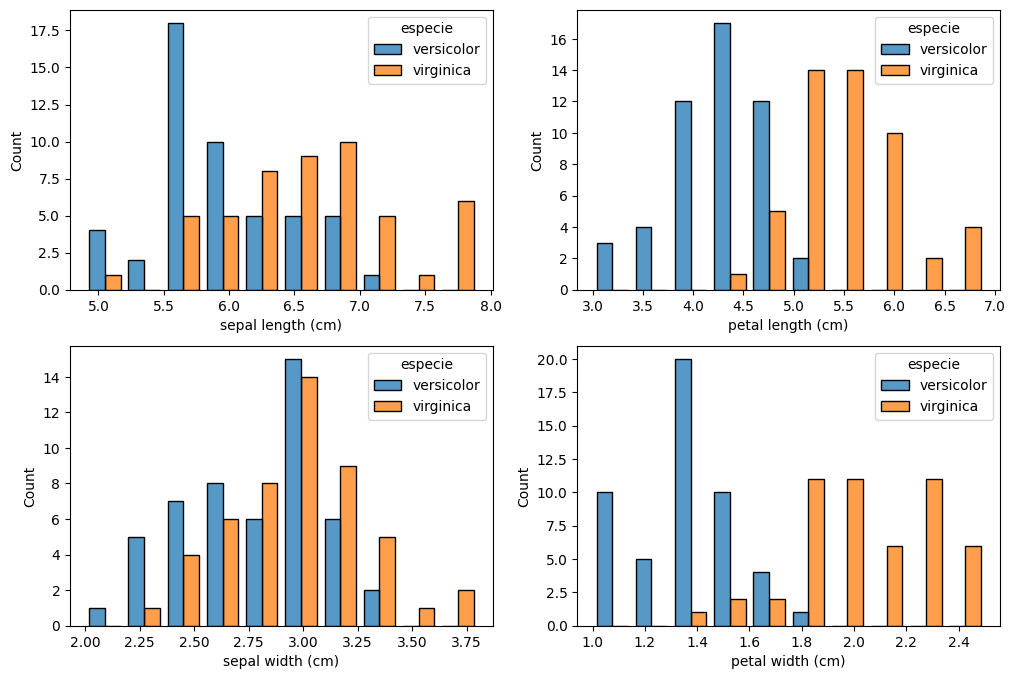

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0][0])
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[1][0])
sns.histplot(data=df, bins=10, x='petal length (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[0][1])
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[1][1])
plt.show()

# Fazendo Scatterplot

Nesta parte escolhi os 2 atributos que melhor diferencia uma espécie da outra, sendo "petal length (cm)" e "petal width (cm)".

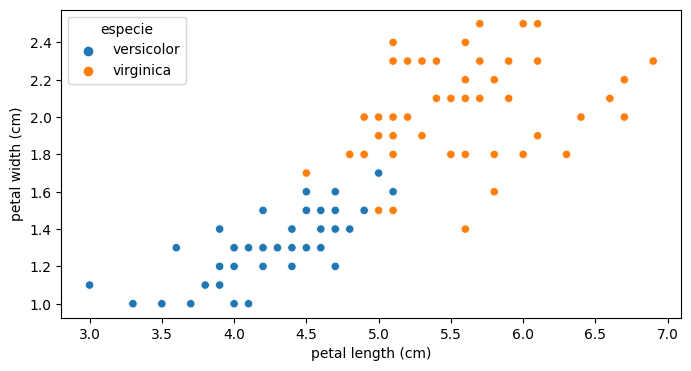

In [7]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.show()

Conforme o gráfico acima, podemos observar que o parâmetro "petal width (cm)" é o que melhor separa as duas espécies. Vamos traçar uma reta em `petal wifth (cm)=1.7`

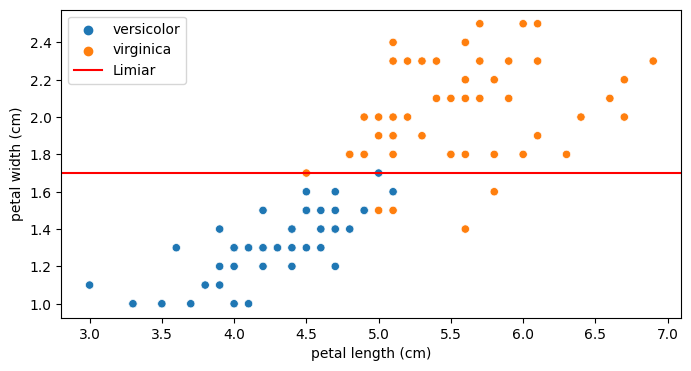

In [8]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.axhline(1.7, color='red', label='Limiar')
plt.legend()
plt.show()

In [18]:
def classificador_limiar(limiar, atributo, dados, rotulos=None):
    predicoes = []
    for idx in range(len(dados)):
        if dados.iloc[idx][atributo] <= limiar:
            predicoes.append(rotulos[0])
        else:
            predicoes.append(rotulos[1])
    return pd.DataFrame(predicoes, columns=['especie'])

# Realizando busca exaustiva para encontrar o melhor limiar

Melhor limiar: 1.600, Melhor Acurácia: 0.940


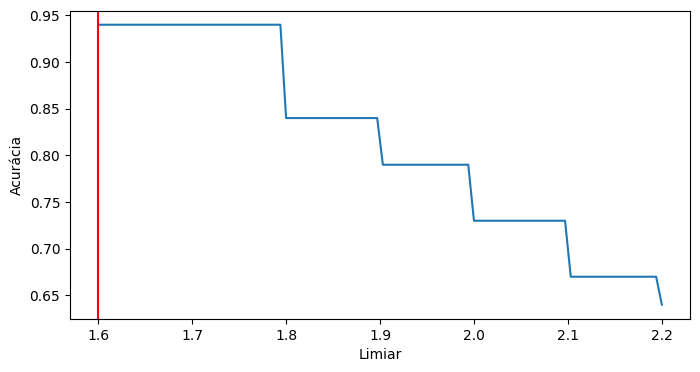

In [19]:
n_limiares = 100
limiares = np.linspace(1.6, 2.2, n_limiares)
acuracias = []

melhor_limiar = limiares[0]
melhor_acuracia = 0

dados = df[['petal width (cm)', 'petal length (cm)']]

for limiar in limiares:
    predicoes = classificador_limiar(limiar, 'petal width (cm)', dados, ['versicolor', 'virginica'])
    acuracia = accuracy_score(df['especie'], predicoes['especie'])
    acuracias.append(acuracia)

    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_limiar = limiar

print("Melhor limiar: %.3f, Melhor Acurácia: %.3f" % (melhor_limiar, melhor_acuracia))

fig, axes = plt.subplots(figsize=(8,4))
axes.plot(limiares, acuracias)
axes.axvline(melhor_limiar, color='red')
axes.set_xlabel('Limiar')
axes.set_ylabel('Acurácia')
plt.show()

In [11]:
X = df[["petal width (cm)", "petal length (cm)"]]
y = df[["especie"]]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=10)

In [12]:
def treinar_classificador_limiar(n_limiares, atributo, rotulos, dados_X, dados_y):
    alt_max = np.max(dados_X[atributo])
    alt_min = np.min(dados_X[atributo])
    limiares = np.linspace(alt_min, alt_max, n_limiares)

    acuracias = []
    melhor_limiar = None
    melhor_acuracia = -1

    for limiar in limiares:
        predicoes = classificador_limiar(limiar, atributo, dados_X, rotulos)
        acuracia = accuracy_score(dados_y, predicoes['especie'])

        if acuracia > melhor_acuracia:
            melhor_acuracia = acuracia
            melhor_limiar = limiar

        acuracias.append(acuracia)

    return melhor_limiar, melhor_acuracia, acuracias

# Realizado busca exaustiva com 20 partições

In [22]:
acuracias = []
n_iteracoes = 20

for i in range(n_iteracoes):
  X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=i)

  limiar, acc, _ = treinar_classificador_limiar(100, 'petal width (cm)', ["versicolor", "virginica"], X_treino, y_treino)

  predicoes = classificador_limiar(limiar, "petal width (cm)", X_teste, ["versicolor", "virginica"])

  acuracias.append(accuracy_score(y_teste['especie'], predicoes["especie"]))

In [23]:
med, desv = np.mean(acuracias), np.std(acuracias)
min, max = np.min(acuracias), np.max(acuracias)

print("Acurácia Média: %.2f +- %.2f (min: %.2f, max: %.2f)" % (med, desv, min, max))

Acurácia Média: 0.95 +- 0.03 (min: 0.85, max: 1.00)
